In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [128]:
#Dropping columns :
#instant-not needed as index is not useful
#weekday,holiday - its already covered in working day so its a repetition
#dteday - already days,year and month is covered in other features
#casual,registered - since casual and registered cannot predict total count,they are just a biforcation of target variable
data.drop(["instant","weekday","holiday","dteday","casual","registered"],axis=1,inplace=True)

In [129]:
data.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [130]:
#Dummy encoding weathersit variable
#Combinations : 
#10 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#01 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#00 - Clear, Few clouds, Partly cloudy, Partly cloudy
# Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -- Absent in data
weather_status=pd.get_dummies(data["weathersit"],drop_first=True)
weather_status.rename(columns={2:"misty",3:"light rain/snow"},inplace=True)
data=pd.concat([data,weather_status],axis=1)
data.drop("weathersit",axis=1,inplace=True)

In [131]:
#Dummy encoding seasons variable
#000-spring
#100-summer
#010-fall
#001-winter
seasons=pd.get_dummies(data["season"],drop_first=True)
seasons.rename(columns={2:"summer",3:"fall",4:"winter"},inplace=True)
data=pd.concat([data,seasons],axis=1)
data.drop("season",axis=1,inplace=True)

In [132]:
#Dataframe after encoding
data.head()

,yr,mnth,workingday,temp,atemp,hum,windspeed,cnt,misty,light rain/snow,summer,fall,winter
0,0,1,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [134]:
#Scaling Numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features=["temp","atemp","hum","windspeed","cnt"]
#Training Set
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
#Test Set
df_test[numeric_features] = scaler.transform(df_test[numeric_features])

<AxesSubplot:>

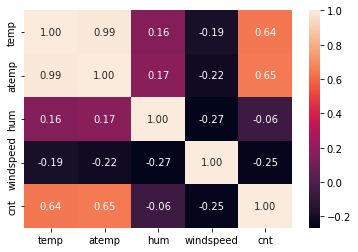

In [135]:
sns.heatmap(df_train[numeric_features].corr(),annot=True,fmt=".2f")

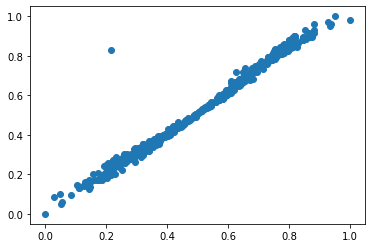

In [142]:
import matplotlib.pyplot as plt
plt.scatter(x=df_train["atemp"],y=df_train["temp"])

In [143]:
#Dropping temp feature since its correlated with atemp very highly and follows a linear relation
#It will lead to multicolinearity in the model hence dropping it from data
#Actual temperature would be more relevant and has more correlation to target variable
df_train.drop("temp",axis=1,inplace=True)
df_test.drop("temp",axis=1,inplace=True)
data.drop("temp",axis=1,inplace=True)


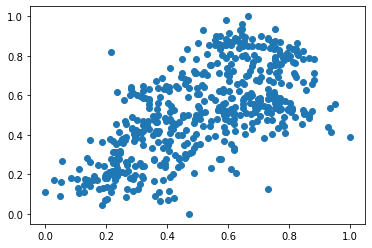

In [144]:
#Checking linearity of predictors with target variable
#actual temperature vs count
plt.scatter(x=df_train["atemp"],y=df_train["cnt"])
plt.show()

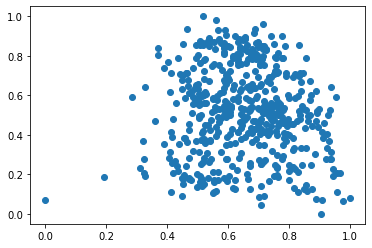

In [145]:
#Checking linearity of predictors with target variable
#humidity vs count
plt.scatter(x=df_train["hum"],y=df_train["cnt"])
plt.show()

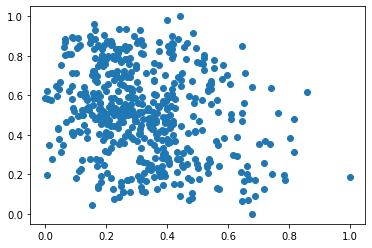

In [146]:
#Checking linearity of predictors with target variable
#windspeed vs count
plt.scatter(x=df_train["windspeed"],y=df_train["cnt"])
plt.show()

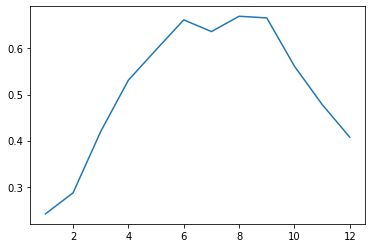

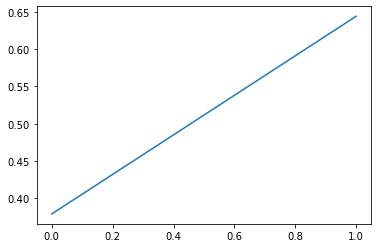

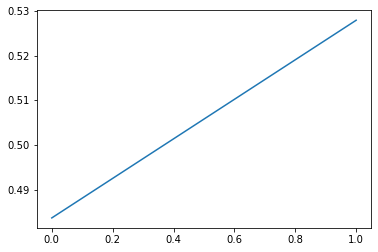

In [173]:
#Checking predictors variation with target variable
df_train_mnth_avg=df_train.groupby("mnth").mean()
plt.plot(df_train_mnth_avg.index,df_train_mnth_avg["cnt"])
plt.show()

df_train_yr_avg=df_train.groupby("yr").mean()
plt.plot(df_train_yr_avg.index,df_train_yr_avg["cnt"])
plt.show()

df_train_workday_avg=df_train.groupby("workingday").mean()
plt.plot(df_train_workday_avg.index,df_train_workday_avg["cnt"])
plt.show()

In [150]:
#All the numeric features show linearity with the target variable, it is good to use multi linear regression for this problem
df_train.columns

Index(['yr', 'mnth', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'misty',
       'light rain/snow', 'summer', 'fall', 'winter'],
      dtype='object')